# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
# weather_api_key = "7a40330807dc5d94c47a636e7d3c7b3d"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create iteration to pull data for each city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# Loop through the list of cities to populate respective data into the lists

city = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []

for x in cities:
    try:
        response = requests.get(query_url + x).json()
        lat.append(response["coord"]['lat'])
        long.append(response["coord"]['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        city.append(x)
        print(x)
    except:
        print("City not found...skipping")
    

bekhtery
mataura
onguday
college
petrovec
City not found...skipping
lavrentiya
broken hill
tuktoyaktuk
mecca
provideniya
City not found...skipping
bethel
ushuaia
quatre cocos
hobart
santa luzia
cape town
calahorra
arraial do cabo
rikitea
baft
vaini
thompson
onzaga
City not found...skipping
busselton
saskylakh
castro
qaqortoq
comodoro rivadavia
barrow
baker city
lamu
City not found...skipping
chokurdakh
beloha
cidreira
wanning
puerto ayora
ola
albany
meulaboh
inuvik
ribeira grande
faanui
jamestown
kastamonu
muisne
port hardy
khani
tasiilaq
show low
lebu
atuona
longyearbyen
bathsheba
hithadhoo
jizan
veraval
muroto
yellowknife
khatanga
makakilo city
punta arenas
lompoc
City not found...skipping
severo-kurilsk
hilo
east london
City not found...skipping
vakhtan
tiksi
sept-iles
qaanaaq
port alfred
gushikawa
pangnirtung
vila franca do campo
alghero
bandarbeyla
City not found...skipping
manosque
wajir
City not found...skipping
nybro
gundlupet
City not found...skipping
City not found...skipping

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the new Output DataFrame
output_df = pd.DataFrame({
    "city" : city,
    "lat" : lat,
    "long" : long,
    "maxtemp" : maxtemp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "windspeed": windspeed,
    "date" : date,
    "country" : country
})
output_df.head(5)

,city,lat,long,maxtemp,humidity,cloudiness,windspeed,date,country
0,bekhtery,46.25,32.29,19.89,82,92,3.71,1592520068,UA
1,mataura,-46.19,168.86,3.89,83,0,1.34,1592519765,NZ
2,onguday,50.75,86.15,9.09,77,14,1.26,1592520068,RU
3,college,64.86,-147.80,24.44,35,75,2.60,1592519776,US
4,petrovec,41.94,21.61,20.00,64,40,3.10,1592520068,MK


In [6]:
# Export the city data into a .csv.
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
output_df.to_csv(output_data_file, index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Inspecting for any cities that have over 100% humidity. If found, this will print the indices of cities that have humidity over 100%.
# REFERENCE:https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

indexhumid = output_df[ output_df['humidity'] > 100 ].index
indexhumid

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Deleting the row indexes from dataFrame that have humidity over 100
# showing df sorted by humidity, in descending fashion to show no results over 100
clean_city_df = output_df.drop(indexhumid , inplace=False)
clean_city_df.sort_values("humidity", axis = 0, ascending = False, inplace = True)
clean_city_df.head()

,city,lat,long,maxtemp,humidity,cloudiness,windspeed,date,country
281,katsuura,35.13,140.30,18.00,100,75,2.1,1592519767,JP
179,ilulissat,69.22,-51.10,1.00,100,90,2.1,1592519777,GL
396,uspantan,15.38,-90.83,13.73,100,99,0.8,1592520098,GT
469,hasaki,35.73,140.83,18.89,100,75,3.1,1592519779,JP
426,nelson bay,-32.72,152.15,10.56,100,75,3.6,1592520054,AU


In [9]:
# Export the City_Data into a csv: saved in output_data folder
clean_city_df.to_csv("../output_data/clean_cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# setting date variable for date stamp
date = time.strftime("%x")

# creating function for Scatter Plots
def scatter_plot(x_values, y_values, title, ylabel):
    plt.scatter(x_values,y_values)
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(f'{title} ({date})', fontsize=14)
    plt.savefig(f'../output_data/{title}.png')
    plt.show()
   


## Latitude vs. Temperature Plot

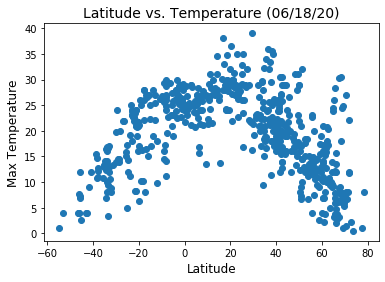

Plotting the relationship between degrees of latitude and temperature. As the latitude approaches zero, temperatures increase.


In [11]:
x_values = clean_city_df["lat"]
y_values = clean_city_df["maxtemp"]
scatter_plot(x_values, y_values, "Latitude vs. Temperature", "Max Temperature")
print(f'Plotting the relationship between degrees of latitude and temperature. As the latitude approaches zero, temperatures increase.')


## Latitude vs. Humidity Plot

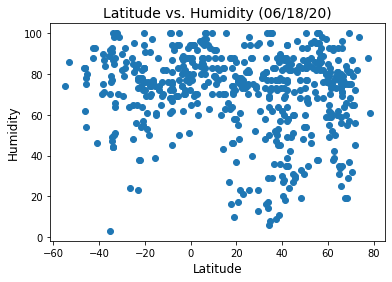

Plotting the relationship between degrees of latitude and humidity.


In [12]:
x_values = clean_city_df["lat"]
y_values = clean_city_df["humidity"]
title = "Latitude vs. Humidity"
scatter_plot(x_values, y_values, "Latitude vs. Humidity", "Humidity")

print(f'Plotting the relationship between degrees of latitude and humidity.')

## Latitude vs. Cloudiness Plot

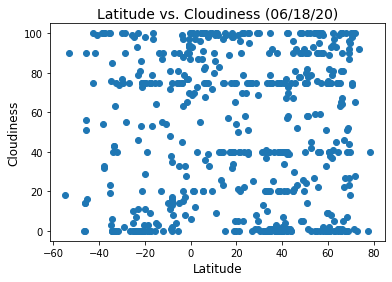

Plotting the relationship between degrees of latitude and cloudiness.


In [13]:
x_values = clean_city_df["lat"]
y_values = clean_city_df["cloudiness"]
title = "Latitude vs. Cloudiness"
scatter_plot(x_values, y_values, "Latitude vs. Cloudiness", "Cloudiness")


print(f'Plotting the relationship between degrees of latitude and cloudiness.')

## Latitude vs. Wind Speed Plot

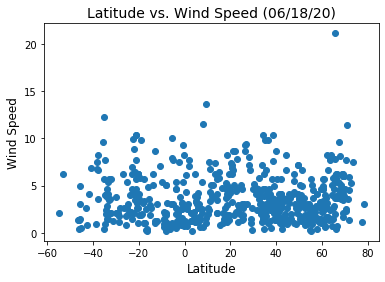

Plotting the relationship between degrees of latitude and wind speed.


In [14]:
x_values = clean_city_df["lat"]
y_values = clean_city_df["windspeed"]
title = "Latitude vs. Wind Speed"
scatter_plot(x_values, y_values, "Latitude vs. Wind Speed", "Wind Speed")

print(f'Plotting the relationship between degrees of latitude and wind speed.')

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_regress(x_values, y_values, title, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(1,3),fontsize=15,color="red")
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(f'{title} ({date})', fontsize=14)
    plt.savefig(f'../output_data/{title}.png')
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
# Northern = latitude > greater than 0, Southern = Latitude < 0
north_hem_df =output_df.loc[output_df["lat"] >= 0]
south_hem_df =output_df.loc[output_df["lat"] <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

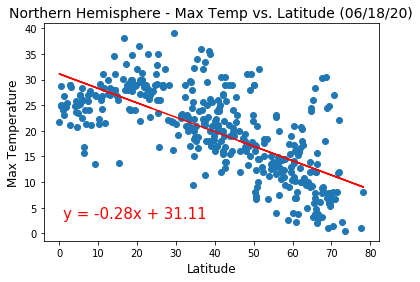

Plotting the relationship between degrees of latitude and max temperature in the Northern Hemisphere. This plot is showing a steady negative correlation between these two variables


In [17]:
x_values = north_hem_df["lat"]
y_values = north_hem_df["maxtemp"]

line_regress(x_values, y_values, "Northern Hemisphere - Max Temp vs. Latitude", "Max Temperature")

print(f'Plotting the relationship between degrees of latitude and max temperature in the Northern Hemisphere. This plot is showing a steady negative correlation between these two variables')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

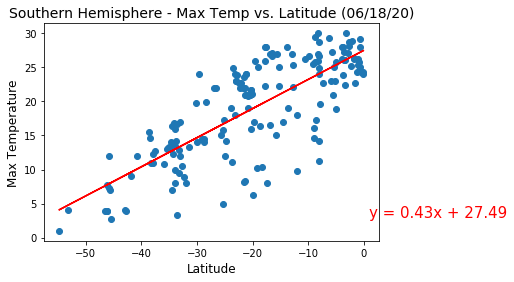

Plotting the relationship between degrees of latitude and max temperature in the Southern Hemisphere. This plot is showing a steady positive correlation between these two variables


In [18]:
x_values = south_hem_df["lat"]
y_values = south_hem_df["maxtemp"]

line_regress(x_values, y_values, "Southern Hemisphere - Max Temp vs. Latitude", "Max Temperature")

print(f'Plotting the relationship between degrees of latitude and max temperature in the Southern Hemisphere. This plot is showing a steady positive correlation between these two variables')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

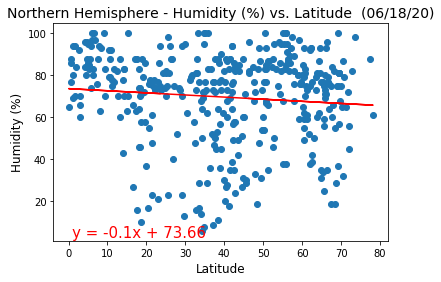

Plotting the relationship between degrees of latitude and humidity in the Northern Hemisphere showing a neutral correlation between these two variables


In [19]:
x_values = north_hem_df["lat"]
y_values = north_hem_df["humidity"]

line_regress(x_values, y_values, "Northern Hemisphere - Humidity (%) vs. Latitude ", "Humidity (%)")
print(f'Plotting the relationship between degrees of latitude and humidity in the Northern Hemisphere showing a neutral correlation between these two variables')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

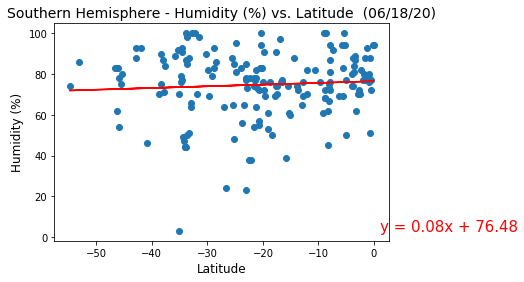

Plotting the relationship between degrees of latitude and humidity in the Southern Hemisphere showing a neutral correlation between these two variables


In [20]:
x_values = south_hem_df["lat"]
y_values = south_hem_df["humidity"]

line_regress(x_values, y_values, "Southern Hemisphere - Humidity (%) vs. Latitude ", "Humidity (%)")
print(f'Plotting the relationship between degrees of latitude and humidity in the Southern Hemisphere showing a neutral correlation between these two variables')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

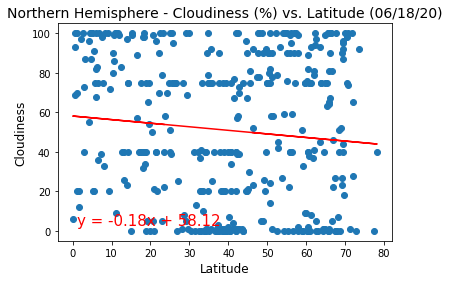

Plotting the relationship between degrees of latitude and cloudiness in the Northern Hemisphere showing a slight negative correlation between these two variables


In [21]:
x_values = north_hem_df["lat"]
y_values = north_hem_df["cloudiness"]

line_regress(x_values, y_values, "Northern Hemisphere - Cloudiness (%) vs. Latitude", "Cloudiness")
print(f'Plotting the relationship between degrees of latitude and cloudiness in the Northern Hemisphere showing a slight negative correlation between these two variables')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

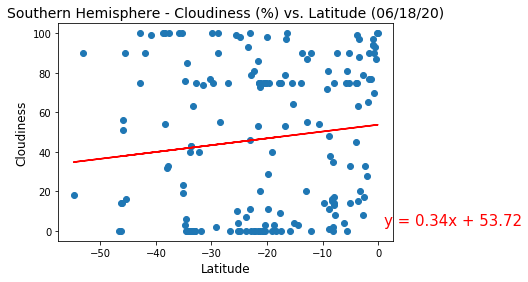

Plotting the relationship between degrees of latitude and cloudiness in the Southern Hemisphere showing a slight positive correlation between these two variables


In [22]:
x_values = south_hem_df["lat"]
y_values = south_hem_df["cloudiness"]

line_regress(x_values, y_values, "Southern Hemisphere - Cloudiness (%) vs. Latitude", "Cloudiness")
print(f'Plotting the relationship between degrees of latitude and cloudiness in the Southern Hemisphere showing a slight positive correlation between these two variables')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

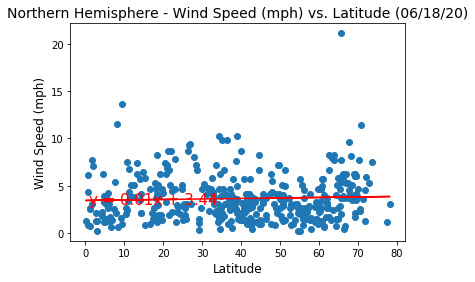

Plotting the relationship between degrees of latitude and wind speed in the Northern Hemisphere showing neutral correlation between these two variables


In [23]:
x_values = north_hem_df["lat"]
y_values = north_hem_df["windspeed"]

line_regress(x_values, y_values, "Northern Hemisphere - Wind Speed (mph) vs. Latitude", "Wind Speed (mph)")
print(f'Plotting the relationship between degrees of latitude and wind speed in the Northern Hemisphere showing neutral correlation between these two variables')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

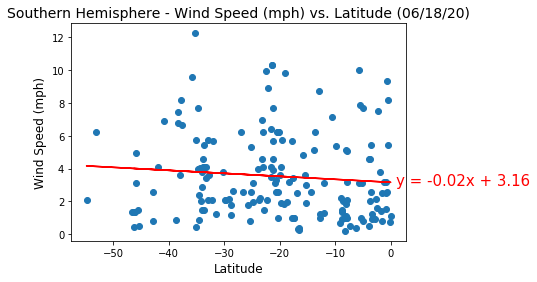

Plotting the relationship between degrees of latitude and wind speed in the Southern Hemisphere showing slight negative correlation between these two variables. This is interesting considering there was zero correlation in the Northern Hemisphere.


In [24]:
x_values = south_hem_df["lat"]
y_values = south_hem_df["windspeed"]

line_regress(x_values, y_values, "Southern Hemisphere - Wind Speed (mph) vs. Latitude", "Wind Speed (mph)")
print(f'Plotting the relationship between degrees of latitude and wind speed in the Southern Hemisphere showing slight negative correlation between these two variables. This is interesting considering there was zero correlation in the Northern Hemisphere.')